# 1. Import and Install Dependencies

In [28]:
!pip install tensorflow
!pip install opencv-python 
!pip install mediapipe 
!pip install scikit-learn
!pip install matplotlib


In [1]:
import cv2
import numpy as np #help us work with different arrays later on and structure datasets
import os
from matplotlib import pyplot as plt #helps visualize images
import time #sleep between frames
import mediapipe as mp #machine learning

# 2. Keypoints using MP Holistic

In [2]:
mp_drawing = mp.solutions.drawing_utils #drawing utils
mp_holistic = mp.solutions.holistic #Holistic model

In [3]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #color conversion
    image.flags.writeable = False                  #image no longer writeable
    results = model.process(image)                # make prediction
    image.flags.writeable = True                  #image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color conversion back
    return image,results                             

In [4]:
#image and results from the mediapipe and use them
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image,results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,10,20),thickness=1,circle_radius = 1),#dot color
                             mp_drawing.DrawingSpec(color=(220,10,90),thickness=1,circle_radius = 1)) #connection color
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(40,10,210),thickness=2,circle_radius = 4),#dot color
                             mp_drawing.DrawingSpec(color=(230,10,90),thickness=2,circle_radius = 4)) #connection color)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,10,230),thickness=2,circle_radius = 4),#dot color
                             mp_drawing.DrawingSpec(color=(220,20,190),thickness=2,circle_radius = 4)) #connection color)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(40,20,20),thickness=2,circle_radius = 4),#dot color
                             mp_drawing.DrawingSpec(color=(220,20,90),thickness=2,circle_radius = 4)) #connection color)

In [6]:
cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.8,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #read feed
        ret, frame = cap.read()
        #make predictions
        image,results = mediapipe_detection(frame,holistic)
        print(results)

        #Draw landmarks
        draw_styled_landmarks(image, results)
        #show on screen
        cv2.imshow('OpenCV Feed', image)
        #break on command
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

C:\Users\HP\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [6]:
len(results.face_landmarks.landmark)

468

In [24]:
draw_styled_landmarks(frame,results)

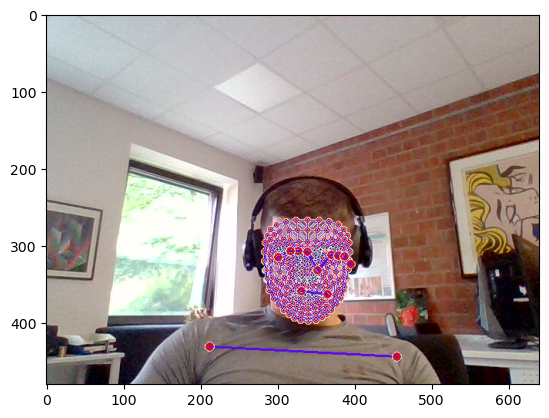

In [25]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# 3.Extract Keypoint Values

In [30]:
results.face_landmarks

landmark {
  x: 0.531805456
  y: 0.74823463
  z: -0.0158860162
}
landmark {
  x: 0.530972302
  y: 0.715773702
  z: -0.0380947776
}
landmark {
  x: 0.531084895
  y: 0.724126041
  z: -0.0176884979
}
landmark {
  x: 0.524810672
  y: 0.678276896
  z: -0.0317328312
}
landmark {
  x: 0.530952752
  y: 0.705043614
  z: -0.0414398
}
landmark {
  x: 0.530862272
  y: 0.689839
  z: -0.0398909077
}
landmark {
  x: 0.530700505
  y: 0.651836932
  z: -0.0244721342
}
landmark {
  x: 0.47976768
  y: 0.642834902
  z: 0.0035645871
}
landmark {
  x: 0.530624032
  y: 0.630090833
  z: -0.0231043287
}
landmark {
  x: 0.530730605
  y: 0.616656542
  z: -0.0265666395
}
landmark {
  x: 0.53042388
  y: 0.556538284
  z: -0.0240998846
}
landmark {
  x: 0.531912684
  y: 0.753209949
  z: -0.0145160779
}
landmark {
  x: 0.531969905
  y: 0.756125927
  z: -0.0116691692
}
landmark {
  x: 0.532007515
  y: 0.756586671
  z: -0.00810189638
}
landmark {
  x: 0.532353342
  y: 0.758930624
  z: -0.00680082198
}
landmark {
  x: 0.

In [7]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [8]:
def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for  res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x,res.y,res.z] for  res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x,res.y,res.z] for  res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x,res.y,res.z] for  res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [86]:
result_test = extract_keypoints(results)

In [87]:
result_test

array([ 0.52951425,  0.61049056, -0.53763425, ...,  0.10726513,
        0.47234565, -0.07433856])

In [ ]:
np.save('0',result_test)

# 4. Setup Folders for Collection

In [9]:
#path for our exported data which essentially is a numpy array
DATA_PATH = os.path.join('MP_Data')

#actions we will try to detect
actions = np.array(['hello','thanks','iloveyou'])
#thirty videos worth of data
no_sequences = 30
#every video will be 30 frames long
sequence_length = 30

shto sakame da naravime vo segmentot podole e da zachuvame broj na folderi kolku shto ni e dolga nizata actions,
za sekoj od tie folderi da se napravat po 30 videa so po 30 frames

hello
    1
    2
    3
    ..30
thanks
    1
    2
    ..30
iloveyou...

In [10]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

# 5.Collect Keypoint Values for Training and Testing

In [11]:
cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5,min_tracking_confidence=0.5) as holistic:
    #NEW LOOP
    #loop through actions
    for action in actions:
        #loop through sequences aka videos
        for sequence in range(no_sequences):
            #loop through length of video or the number of frames
            for frame_num in range(sequence_length):
            
                #read feed
                ret, frame = cap.read()
                #make predictions
                image,results = mediapipe_detection(frame,holistic)
                print(results)
        
                #Draw landmarks
                draw_styled_landmarks(image, results)
        
                # NEW apply collection logic
                if frame_num == 0:
                    cv2.putText(image,'START COLLECTION',(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1,(0,255,0),4,cv2.LINE_AA)
                    cv2.putText(image,'COLLECTION FRAMES FOR {} VIDEO NUMBER {}'.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,0,255),1,cv2.LINE_AA)
                    #show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image,'COLLECTION FRAMES FOR {} VIDEO NUMBER {}'.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,0,255),1,cv2.LINE_AA)
                    #show to screen
                    cv2.imshow('OpenCV Feed', image)
                #NEW export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,action, str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                #show on screen
                cv2.imshow('OpenCV Feed', image)
                #break on command
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 6.Preprocess Data and Create Labels and Features

# 7. BUild and Train LSTM Neural Network

# 8. Make Predictions

# 9. Save Weights

# 10. Calcuaiton Using Confusion Matrix and  Accuracy

# 11. Test in Real Time